<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Third_Day_Fifa19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FIFA 19 complete player
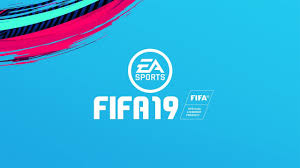

##Context
###Football analytics

##Content
###Detailed attributes for every player registered in the latest edition of FIFA 19 database.

###ID : unique id for every player
###Name : name of the player
###Age : age of the player
###Nationality : nationality
###Flag : url to players's country flag
###Overall : overall rating 
###Potential : potential rating
###Club: current club

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
pip install country_converter

In [ ]:
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import plotly.graph_objects as go
import country_converter as coco
from plotly.subplots import make_subplots
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
pd.set_option("display.max_columns", None)

##Data Preparation and Cleaning
###Load the file using Pandas
###Look at some information about the data & the columns
###Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/karangadiya/fifa19"
od.download(path)

Skipping, found downloaded files in "./fifa19" (use force=True to force download)


In [ ]:
path_c= "./fifa19"
os.listdir(path_c)

['data.csv']

In [ ]:
# Read the file 
data=pd.read_csv(path_c+"/data.csv")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
#Size of data
data.shape

(18207, 89)

In [ ]:
#Type of data
data.dtypes[:25]

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
dtype: object

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


##Data Cleaning 

In [ ]:
#stats
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
# data_f for the first analysis 
data_f = data[["Name",'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage',"Preferred Foot","Position"]]
st = "Crossing	Finishing	HeadingAccuracy	ShortPassing	Volleys	Dribbling	Curve	FKAccuracy LongPassing	BallControl	Acceleration	SprintSpeed	Agility	Reactions	Balance	ShotPower	Jumping	Stamina	Strength	LongShots	Aggression	Interceptions	Positioning	Vision	Penalties"
li=st.split()
print(li)

['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties']


In [ ]:
# data_s for the second analysis 
data_s = data[['Position','Overall','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties']]

## First Data : data_f

In [ ]:
# remove K , M & €  form Value and Wage 
data_f['Wage'] = data_f['Wage'].str.replace('€','')
data_f['Wage'] = data_f['Wage'].str.replace('K','').astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_f['Value'] = data_f['Value'].str.replace('€','')
data_f['Value'] = data_f['Value'].str.replace('M','')
data_f['Value'] = data_f['Value'].str.replace('K','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
data_f.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM


In [ ]:
#duplicate rows 
duplicate_rows_data_f = data_f[data_f.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_f.shape)
print(duplicate_rows_data_f)


number of duplicate rows:  (0, 9)
Empty DataFrame
Columns: [Name, Age, Nationality, Overall, Club, Value, Wage, Preferred Foot, Position]
Index: []


In [ ]:
data_f.count()

Name              18207
Age               18207
Nationality       18207
Overall           18207
Club              17966
Value             18207
Wage              18207
Preferred Foot    18159
Position          18147
dtype: int64

In [ ]:
data_f = data_f.drop_duplicates()
data_f.head(5)

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM


In [ ]:
data_f.count()

Name              18207
Age               18207
Nationality       18207
Overall           18207
Club              17966
Value             18207
Wage              18207
Preferred Foot    18159
Position          18147
dtype: int64

In [ ]:
# Missing values 
print(data_f.isnull().sum())

Name                0
Age                 0
Nationality         0
Overall             0
Club              241
Value               0
Wage                0
Preferred Foot     48
Position           60
dtype: int64


In [ ]:
data_f[data_f["Club"].isnull()]

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position
452,L. Paredes,24,Argentina,80,NaN,0.0,0.0,Right,CM
538,A. Granqvist,33,Sweden,80,NaN,0.0,0.0,Right,LCB
568,A. Lunev,26,Russia,79,NaN,0.0,0.0,Right,GK
677,I. Smolnikov,29,Russia,79,NaN,0.0,0.0,Right,RB
874,A. Dzyuba,29,Russia,78,NaN,0.0,0.0,Right,ST
...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,NaN,0.0,0.0,Right,GK
17215,K. Taimi,26,Finland,55,NaN,0.0,0.0,Right,RB
17339,S. Passi,23,India,54,NaN,0.0,0.0,Right,NaN
17436,D. Lalhlimpuia,20,India,54,NaN,0.0,0.0,Right,NaN


In [ ]:
### We can't drop this missing data
###However ,and in reality,  many players dont have a team in this year but they have a high rating. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

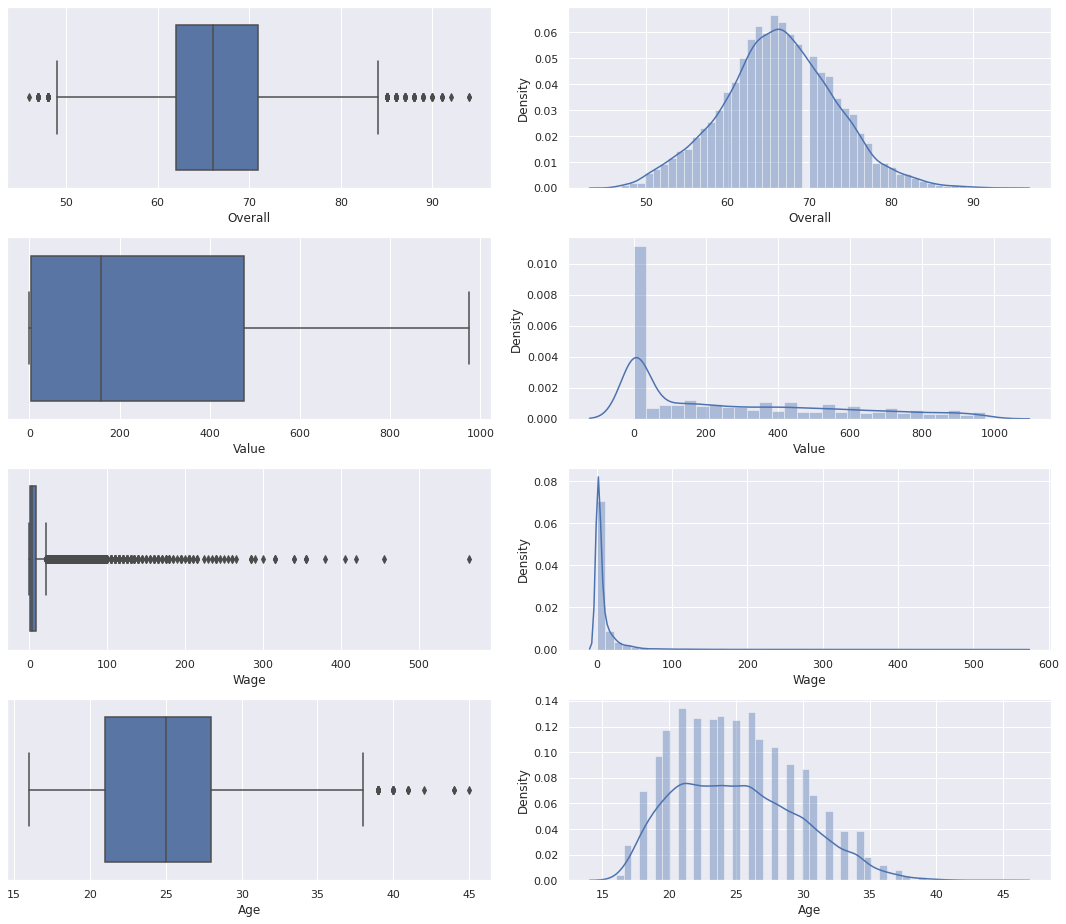

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= data_f["Overall"], ax = ax[0,0])
sns.distplot(data_f['Overall'], ax = ax[0,1])
sns.boxplot(x= data_f["Value"], ax = ax[1,0])
sns.distplot(data_f['Value'], ax = ax[1,1])
sns.boxplot(x= data_f["Wage"], ax = ax[2,0])
sns.distplot(data_f['Wage'], ax = ax[2,1])
sns.boxplot(x= data_f["Age"], ax = ax[3,0])
sns.distplot(data_f['Age'], ax = ax[3,1])
plt.tight_layout()


 There is no outlier here !! 
the highests values are normales. 

## So let's make some analysis with the first dataframe

###Question 1 : Top 20 rated players  

In [ ]:
data_f.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM


In [ ]:
top_rated = data_f[['Name','Overall']]
top_rated = top_rated.sort_values('Overall',ascending=False).head(20)

In [ ]:
fig = px.bar(top_rated, x='Name',y='Overall',title='Top Rated Players')
fig.show()

###Question 2 : Top 20 expensive players 

In [ ]:
top_rated = data_f[['Name','Wage']]
top_rated = top_rated.sort_values('Wage',ascending=False).head(20)

In [ ]:
fig = px.bar(top_rated, x='Name',y='Wage',title='Top expensive Players(in M€)')
fig.show()

###Question 3 : Top 20 powerful Country ( overall of players )


In [ ]:
data_f.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM


In [ ]:
#group data by Country & sort by overall 
df=data_f[["Nationality","Overall"]]
#df.groupby(by=["Nationality"])
df=df.sort_values(["Overall"],ascending=False)
df.head()

,Nationality,Overall
0,Argentina,94
1,Portugal,94
2,Brazil,92
3,Spain,91
4,Belgium,91


In [ ]:
#we choose the top 23 players of a country and compare ** 
liste=df["Nationality"].unique()
dicte={}
for i in liste:
  dicte[i]=df[df["Nationality"]==i][:23]["Overall"].sum()

In [ ]:
#dict to dataframe and sort the data !
dt=pd.DataFrame.from_dict(dicte, orient='index',columns=['Rating'])
dt=dt.sort_values(["Rating"],ascending=False)
dt=dt.reset_index()
dt=dt.rename(columns={"index":"Country"})
dt

,Country,Rating
0,Spain,1976
1,Brazil,1968
2,France,1955
3,Germany,1954
4,Italy,1927
...,...,...
159,Malta,61
160,Belize,60
161,South Sudan,60
162,Indonesia,56


In [ ]:
# and now , we will make the vizualisation
fig = px.bar(dt[:20], x='Country',y='Rating',title='Top Rated Players')
fig.show()

###Question 4 : Top 20 powerful Club ( overall of players )

In [ ]:
#group data by Country & sort by overall 
df=data_f[["Club","Overall"]]
# each club have 33 players  , so we can work with the mean of players overall in the team
df=df.groupby(by=["Club"]).sum()
df=df.sort_values(["Overall"],ascending=False)
df=df.reset_index()
df['Overall']=df['Overall']/33

In [ ]:
# and now , we will make the vizualisation
fig = px.bar(df[:20], x='Club',y='Overall',title='Top 20 powerful clubs')
fig.show()

In [ ]:
#Real madrid is the powerful team in the human resource ,
#In fact , real madrid was the winners of the champion league three successive time in 2016,2017,2018

###Question 5 : Number of players in each country 

In [ ]:
data_f['Nationality'] = data_f['Nationality'].replace({'England':'United Kingdom'})
data_f['Nationality'] = data_f['Nationality'].replace({'Wales':'United Kingdom'})
data_f['Nationality'] = data_f['Nationality'].replace({'Scotland':'United Kingdom'})
data_f['Nationality'] = data_f['Nationality'].replace({'Northern Ireland':'Ireland'})

In [ ]:
data_f['Nas'] = coco.convert(data_f['Nationality'],to='ISO3')

In [ ]:
data_f.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position,Nas
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF,ARG
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST,PRT
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW,BRA
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK,ESP
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM,BEL


In [ ]:
country_num = data_f['Nas'].value_counts().reset_index(name='count')
country_num 

,index,count
0,GBR,2077
1,DEU,1198
2,ESP,1072
3,ARG,937
4,FRA,914
...,...,...
156,GUM,1
157,FJI,1
158,NCL,1
159,BLZ,1


In [ ]:
fig = px.choropleth(country_num, locations='index', color='count', hover_name='index', color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###Question 6 : The best group of players we can play with it in  FIFA 19 

In [ ]:
pos =  data_f['Position'].unique()

In [ ]:
#liste of position
pos = list(pos)
pos = [x for x in pos if str(x) != 'nan']
# find the most rated player in each position 
for i in pos:
  d = data_f[data_f['Position']==i]
  d=d.sort_values('Overall', ascending=False)
  d=d.iloc[0]
  print(f"the best player for {i} is {d['Name']}")

the best player for RF is L. Messi
the best player for ST is Cristiano Ronaldo
the best player for LW is Neymar Jr
the best player for GK is De Gea
the best player for RCM is K. De Bruyne
the best player for LF is E. Hazard
the best player for RS is L. Suárez
the best player for RCB is Sergio Ramos
the best player for LCM is T. Kroos
the best player for CB is D. Godín
the best player for LDM is N. Kanté
the best player for CAM is A. Griezmann
the best player for CDM is Sergio Busquets
the best player for LS is E. Cavani
the best player for LCB is G. Chiellini
the best player for RM is K. Mbappé
the best player for LAM is J. Rodríguez
the best player for LM is P. Aubameyang
the best player for LB is Marcelo
the best player for RDM is P. Pogba
the best player for RW is Bernardo Silva
the best player for CM is Thiago
the best player for RB is Azpilicueta
the best player for RAM is J. Cuadrado
the best player for CF is Luis Alberto
the best player for RWB is M. Ginter
the best player for L

###Question 7 : Top 5 rated Goalkeepers


In [ ]:
dr=data_f[data_f['Position']=='GK']
dr=dr.sort_values('Overall', ascending=False)

In [ ]:
# and now , we will make the vizualisation
fig = px.bar(dr[:5], x='Name',y='Overall',title='Top 5 rated GK')
fig.show()

###Question 8 : Preferred Foot statistics 

In [ ]:
data_f.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Position,Nas
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565.0,Left,RF,ARG
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405.0,Right,ST,PRT
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290.0,Right,LW,BRA
3,De Gea,27,Spain,91,Manchester United,72.0,260.0,Right,GK,ESP
4,K. De Bruyne,27,Belgium,91,Manchester City,102.0,355.0,Right,RCM,BEL


In [ ]:
foot = data_f['Preferred Foot'].value_counts().reset_index(name='percent')
fig = px.pie(foot,values='percent',names='index',title='Preferred Foot statistics')
fig.show()

###Question 9 : Overall Rating vs. Wage| Age

In [ ]:
# Overall rating by Wage
dow = data_f[["Overall","Wage"]]
dow.head()

,Overall,Wage
0,94,565.0
1,94,405.0
2,92,290.0
3,91,260.0
4,91,355.0


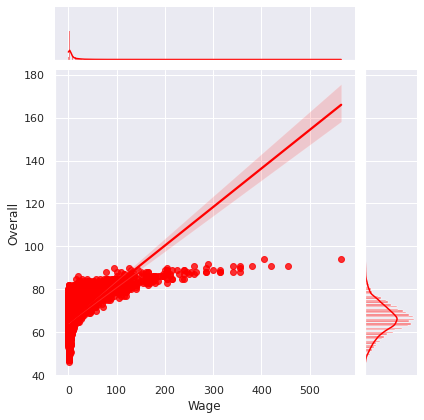

In [ ]:
sns.jointplot(data=dow, x='Wage', y='Overall',kind="reg",color='red')

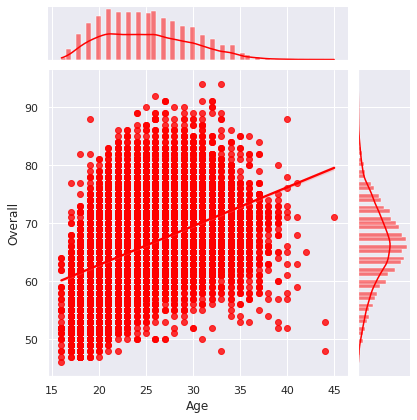

In [ ]:
# Overall rating by Age
doa = data_f[["Overall","Age"]]
sns.jointplot(data=doa, x='Age', y='Overall',kind="reg",color='red')

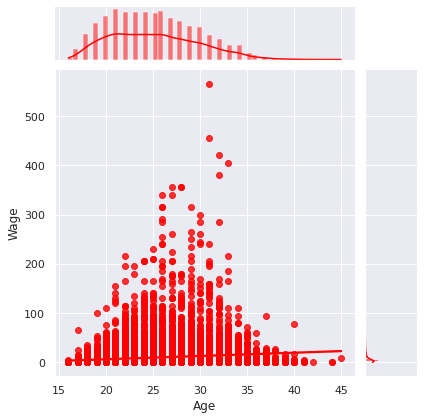

In [ ]:
# Wage by Age
doa = data_f[["Wage","Age"]]
sns.jointplot(data=doa, x='Age', y='Wage',kind="reg",color='red')

In [ ]:
#### The most expensive players have an age between 25 and 35 , L.Messi is the highest one **bold text**

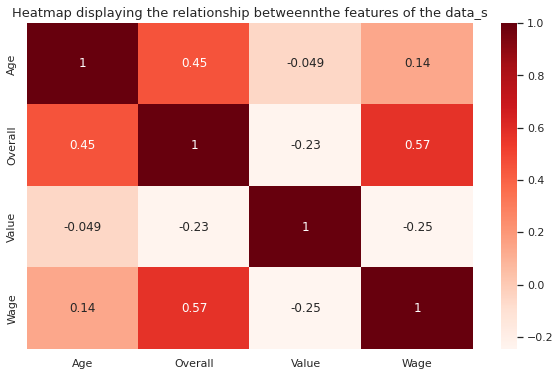

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_f.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data_s',
         fontsize=13)
plt.show()

##Second Data : data_s

In [ ]:
data_s.head()

,Position,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,RF,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,ST,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,LW,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,GK,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,RCM,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [ ]:
data_s.dtypes

Position            object
Overall              int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
dtype: object

In [ ]:
#duplicate rows 
duplicate_rows_df = data_s[data_s.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (48, 27)


In [ ]:
data_s = data_s.drop_duplicates()
data_s.head(5)

,Position,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,RF,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,ST,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,LW,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,GK,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,RCM,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [ ]:
# Data Cleaning 
data_s.isnull().sum()

Position           13
Overall             0
Crossing            1
Finishing           1
HeadingAccuracy     1
ShortPassing        1
Volleys             1
Dribbling           1
Curve               1
FKAccuracy          1
LongPassing         1
BallControl         1
Acceleration        1
SprintSpeed         1
Agility             1
Reactions           1
Balance             1
ShotPower           1
Jumping             1
Stamina             1
Strength            1
LongShots           1
Aggression          1
Interceptions       1
Positioning         1
Vision              1
Penalties           1
dtype: int64

In [ ]:
# we will drop the missing data
data_s = data_s.dropna()    # Dropping the missing values.
data_s.count()

Position           18146
Overall            18146
Crossing           18146
Finishing          18146
HeadingAccuracy    18146
ShortPassing       18146
Volleys            18146
Dribbling          18146
Curve              18146
FKAccuracy         18146
LongPassing        18146
BallControl        18146
Acceleration       18146
SprintSpeed        18146
Agility            18146
Reactions          18146
Balance            18146
ShotPower          18146
Jumping            18146
Stamina            18146
Strength           18146
LongShots          18146
Aggression         18146
Interceptions      18146
Positioning        18146
Vision             18146
Penalties          18146
dtype: int64

In [ ]:
# so lets choose the columns to work with : Overall , ShortPassing , LongPassing ,Acceleration , Agility , Strength , Vision ,Penalties
col=["Overall" , "ShortPassing" , "LongPassing" ,"Acceleration" ,"Agility" , "Strength" , "Vision" ,"Penalties"]
col = list(col)
print(col)

['Overall', 'ShortPassing', 'LongPassing', 'Acceleration', 'Agility', 'Strength', 'Vision', 'Penalties']


In [ ]:
data_s.head()

,Position,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,RF,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,ST,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,LW,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,GK,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,RCM,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

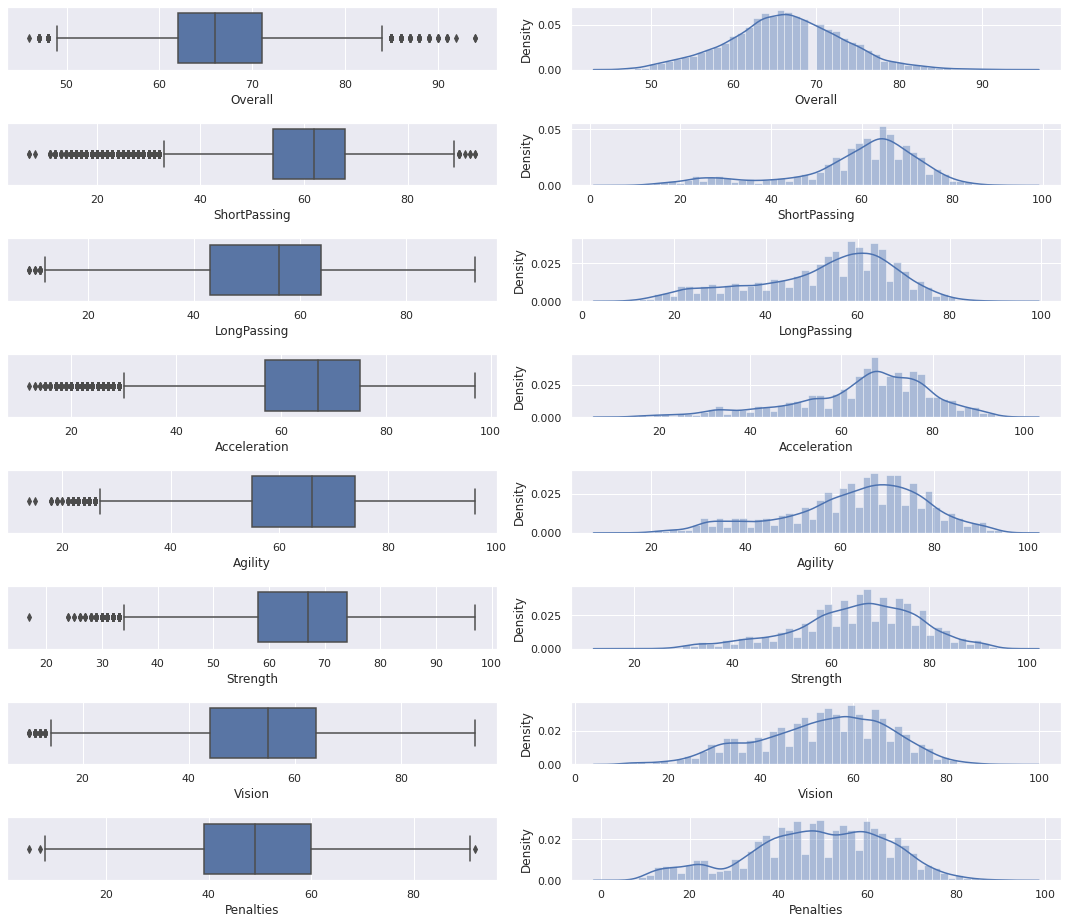

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(8, 2, figsize = (15, 13))
i,j=(0,0)
for t in col:
  sns.boxplot(x=data_s[t],ax=ax[i,j])
  j=j+1
  sns.distplot(data_s[t], ax = ax[i,j])
  i=i+1
  j=0
plt.tight_layout()

In [ ]:
# there is no Outlier , lets make some analysis

In [ ]:
strikers = data_s[data_s['Position'] == 'ST']
list_st=['Finishing','BallControl','Jumping','Aggression']
fig = make_subplots(rows=4,cols=2, subplot_titles=('Overall Rating vs. Finishing','Overall Rating vs. BallControl','Overall Rating vs. Jumping','Overall Rating vs. Aggression'))

fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Finishing'], showlegend=False,mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['BallControl'], showlegend=False,mode='markers'),row=1,col=2)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Jumping'], showlegend=False,mode='markers'),row=2,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Aggression'], showlegend=False,mode='markers'),row=2,col=2)

fig.update_layout(title='  Individual Qualities by Overall Rating for ST')
fig.show()

In [ ]:
c_forwards = data_s[data_s['Position'] == 'CF']
list_c_f=['Stamina','SprintSpeed','ShortPassing','LongPassing']
fig = make_subplots(rows=4,cols=2, subplot_titles=('Overall Rating vs. Stamina','Overall Rating vs. SprintSpeed','Overall Rating vs. ShortPassing','Overall Rating vs. LongPassing'))

fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Stamina'], showlegend=False,mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['SprintSpeed'], showlegend=False,mode='markers'),row=1,col=2)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['ShortPassing'], showlegend=False,mode='markers'),row=2,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['LongPassing'], showlegend=False,mode='markers'),row=2,col=2)
fig.update_layout(title='  Individual Qualities by Overall Rating for CF')
fig.show()

In [ ]:
# Overall Rating vs. Individual Qualities 
# FOR all postions 
qualities=["ShortPassing" , "LongPassing" ,"Acceleration" ,"Agility" , "Strength" , "Vision" ,"Penalties","Crossing"]

fig = make_subplots(rows=4,cols=2, subplot_titles=('Overall Rating vs. SortPassing','Overall Rating vs. LongPassing', 'Overall Rating vs. Acceleration', 'Overall Rating vs. Agility','Overall Rating vs. Strength', 'Overall Rating vs. Vision','Overall Rating vs. Penalties'))

fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['ShortPassing'], showlegend=False,mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['LongPassing'], showlegend=False,mode='markers'),row=1,col=2)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Acceleration'], showlegend=False,mode='markers'),row=2,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Agility'], showlegend=False,mode='markers'),row=2,col=2)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Strength'], showlegend=False,mode='markers'),row=3,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Vision'], showlegend=False,mode='markers'),row=3,col=2)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Crossing'], showlegend=False,mode='markers'),row=4,col=1)
fig.add_trace(go.Scatter(x=data_s['Overall'],y=data_s['Penalties'], showlegend=False,mode='markers'),row=4,col=2)
fig.update_layout(title='  Individual Qualities by Overall Rating ')
fig.show()

In [ ]:
 # ! End .